In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('results_big.csv')
df

,step,pid,tickets,ticks
0,0,4,30,79
1,0,5,20,75
2,0,6,10,12
3,1,4,30,138
4,1,5,20,100
...,...,...,...,...
295,98,5,20,5323
296,98,6,10,2586
297,99,4,30,8086
298,99,5,20,5364


In [17]:
[f'pid {pid} (tickets: {tickets})' for pid, tickets in df.groupby('pid')['tickets'].first().items()]

['pid 4 (tickets: 30)', 'pid 5 (tickets: 20)', 'pid 6 (tickets: 10)']

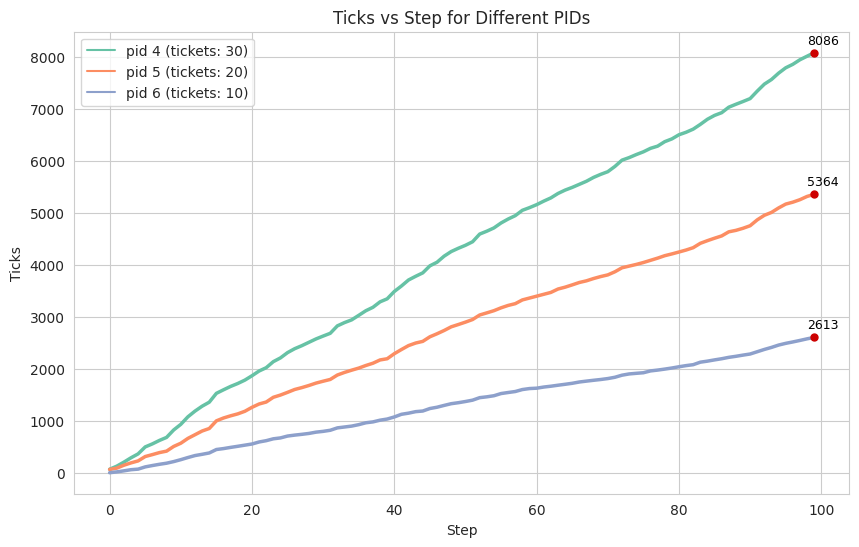

In [29]:
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", 3)

plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=df, x='step', y='ticks', hue='pid', linewidth=2.5, palette=palette)

plt.xlabel('Step')
plt.ylabel('Ticks')
plt.title('Ticks vs Step for Different PIDs')

legend_labels = [f'pid {pid} (tickets: {tickets})' for pid, tickets in df.groupby('pid')['tickets'].first().items()]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles[:len(legend_labels)], labels=legend_labels, loc='upper left')

for pid, group in df.groupby('pid'):
    last_step = group.iloc[-1]
    plt.plot(last_step['step'], last_step['ticks'], marker='o', markersize=5, label=f'pid {pid} last step', color='#CD0000')
    plt.annotate(f'{last_step["ticks"]}',
                 xy=(last_step['step']+0.1, last_step['ticks']),
                 xytext=(last_step['step'] - 1, last_step['ticks'] + 165),
                 fontsize=9,
                 color='black')

plt.show()


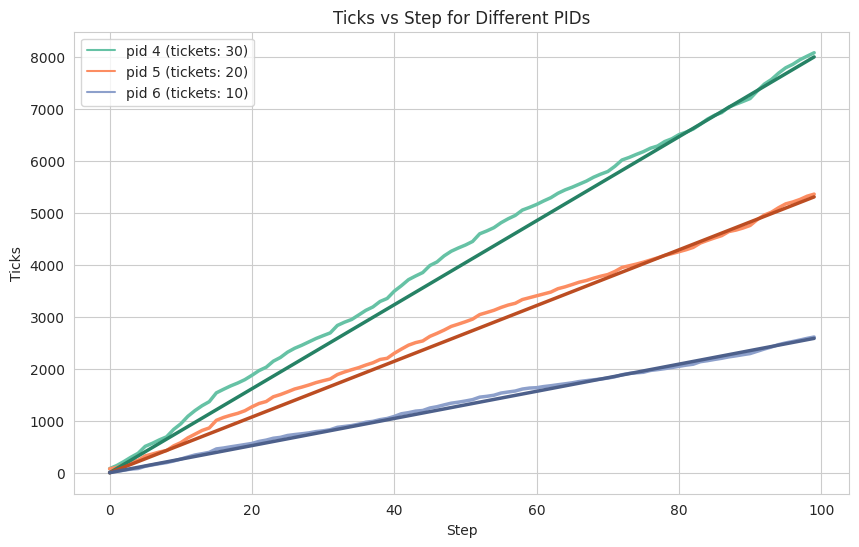

In [28]:
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", 3)

plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=df, x='step', y='ticks', hue='pid', linewidth=2.5, palette=palette)

plt.xlabel('Step')
plt.ylabel('Ticks')
plt.title('Ticks vs Step for Different PIDs')

alphas = df.groupby('pid').apply(lambda x: x.iloc[-1]).reset_index(drop=True)['ticks']/100

for i, alpha in enumerate(alphas):
    sns.lineplot(x=np.arange(100), y=np.arange(100)*alpha, linewidth=2.5, color=abs(np.array(palette[i]) - 0.25))
    
legend_labels = [f'pid {pid} (tickets: {tickets})' for pid, tickets in df.groupby('pid')['tickets'].first().items()]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles[:len(legend_labels)], labels=legend_labels, loc='upper left')
    
plt.show()


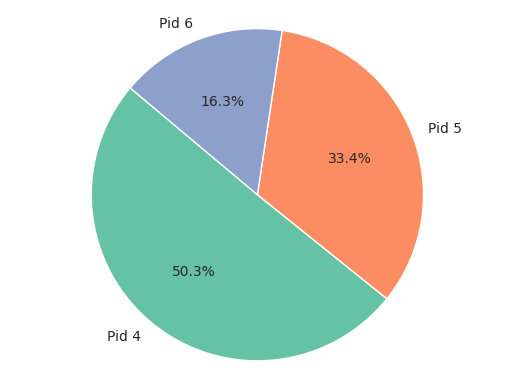

In [6]:
labels = ['Pid 4', 'Pid 5', 'Pid 6']
proportions = [alpha/alphas[2] for alpha in alphas]

colors = sns.color_palette('Set2', len(proportions))

plt.pie(proportions, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.show()
